# Does Incumbency Advantage Exist In Taiwan's Legislator Elections?
> Go through turnout in different cities.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# How people measure incumbency advantage

## Regression discontinuity

# Taiwan's legislator elections

Elected every four year. 

| Category      | Seats | Voting Method  |
| ------------- |:-----:| :-------------:|
| Regional      | 73    | single-member districts |
| Party         | 34    | party-list proportional representation voting |
| Indigenous    | 6     | single non-transferable voting in multi-member districts, exclusive for persons with indigenous status |
| - |-|-| 
| Total      |113    |  |


In [3]:
#hide
library("ggplot2")
library("rdrobust")
dt <- readr::read_csv("legislatorRD4R.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  name = col_character(),
  DPP_elected = col_logical(),
  KMT_elected = col_logical(),
  DPP_elected_last = col_logical(),
  KMT_elected_last = col_logical()
)

See spec(...) for full column specifications.



Warning message:
“Removed 101 rows containing missing values (geom_point).”


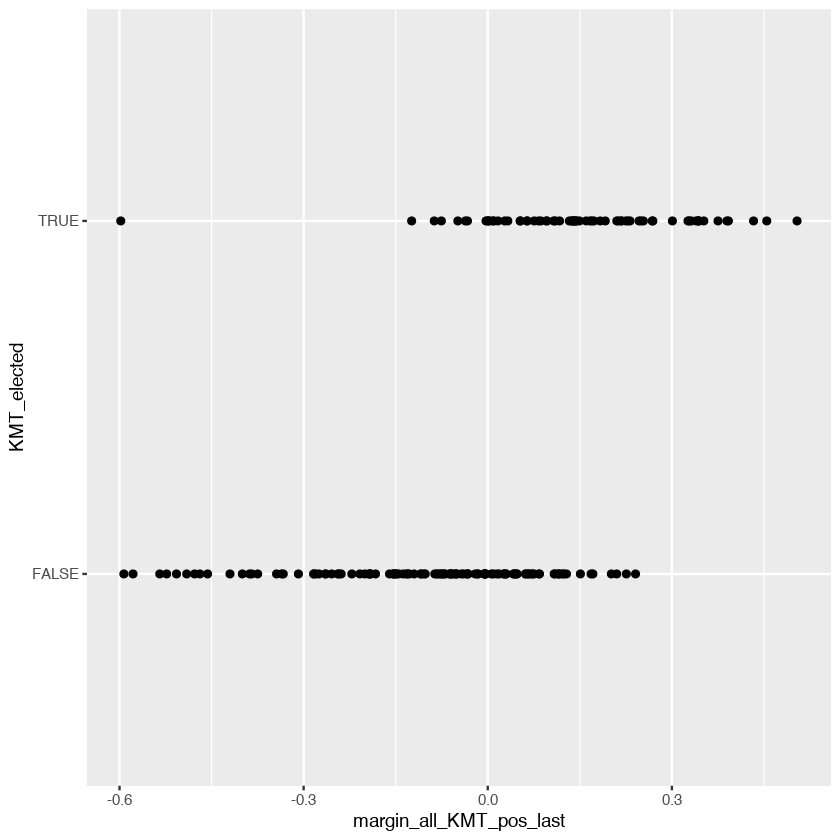

In [6]:
#collapse-hide
ggplot(dt) +
geom_point(aes(x = margin_all_KMT_pos_last, y = KMT_elected))

Call: rdplot

Number of Obs.                  188
Kernel                      Uniform

Number of Obs.                  90             98
Eff. Number of Obs.             90             98
Order poly. fit (p)              1              1
BW poly. fit (h)             0.598          0.504
Number of bins scale             1              1

Bins Selected                    8              5
Average Bin Length           0.075          0.101
Median Bin Length            0.054          0.058

IMSE-optimal bins                8              5
Mimicking Variance bins          9              9

Relative to IMSE-optimal:
Implied scale                1.000          1.000
WIMSE variance weight        0.500          0.500
WIMSE bias weight            0.500          0.500



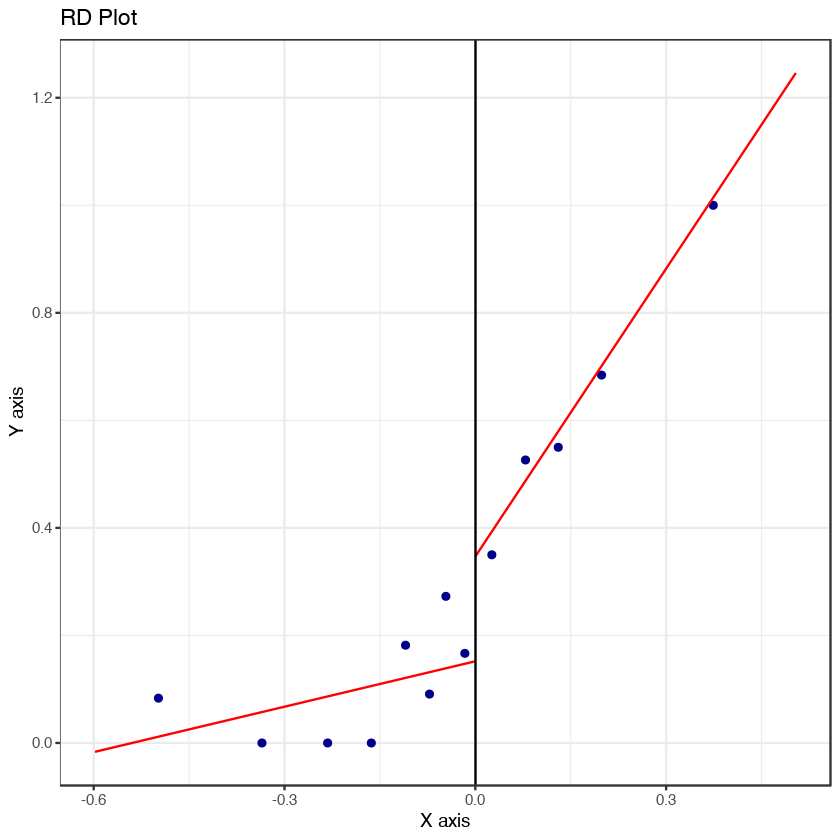

In [8]:
#collapse-hide
Y <- dt$KMT_elected
X <- dt$margin_all_KMT_pos_last
out <- rdplot(Y, X,  binselect = "qs", p = 1)
summary(out)